In [1]:
# 선형 모델 
# 선형 모델은 입력 데이터에 대한 선형 함수를 만들어 예측 수행 
# y(w, x) = w0 + w1x1 + ... + wpxp

# x: 입력 데이터(feature = 변수)
# w: 모델이 학습할 파라미터 
# w0: 편향(y절편)
# w1~wp : 가중치(feature들마다 가중치를 두어서 가중치에 반영이 되는 선형모델이 만들어짐)

In [2]:
# 선형 회귀(Linear Regression) = 최소 제곱법(Ordinary Least Squres)
# 선형 회귀는 모델의 예측과 정답 사이의 평균제곱오차(mean squared error)를 최소화하는 학습 파라미터 W를 찾음

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

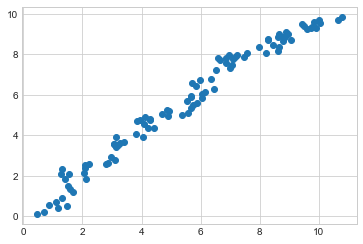

In [5]:
noise = np.random.rand(100,1) # 너무 정직하면 안되니깐  noise를 줄것
X = sorted(10 * np.random.rand(100, 1)) + noise  # 여러가지 Feature가 있다고 가장을 해서 대문자
y = sorted(10 * np.random.rand(100))

plt.scatter(X, y);

In [6]:
# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [7]:
model = LinearRegression() # 파라미터 없이

In [8]:
model.fit(X_train, y_train)

LinearRegression()

In [9]:
# 모델 회귀 가중치와 회귀 편향
print("선형 회귀 가중치: {}".format(model.coef_))
print("선형 회귀 편향: {}".format(model.intercept_))
# 입력 데이터가 하나인 관계로 x1에 대해서만 입력되어 있고 x1에 대한 가중치 값 w1 확인

선형 회귀 가중치: [0.99091625]
선형 회귀 편향: 0.21377780861587325


In [10]:
print("학습 데이터 점수 : {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수 : {}".format(model.score(X_test, y_test)))

학습 데이터 점수 : 0.9712124652032272
평가 데이터 점수 : 0.9700672847084547


In [11]:
# 시각화

In [12]:
predict = model.predict(X_test)

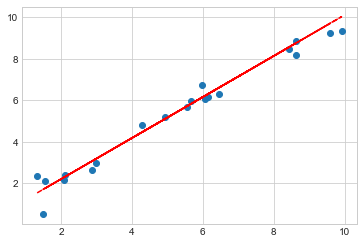

In [13]:
plt.scatter(X_test, y_test)        # 실제값
plt.plot(X_test, predict, 'r--'); #예측값

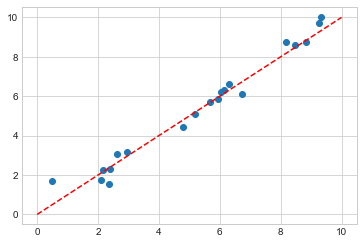

In [14]:
plt.scatter(y_test, predict); # 예측값
plt.plot([0, 10], [0, 10], '--r'); # 실제값

In [15]:
# 보스턴 주택 가격 데이터를 활용

In [16]:
from sklearn.datasets import load_boston

In [17]:
boston = load_boston()

In [18]:
print(boston.keys())
print(boston.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX

In [19]:
# 보스턴 데이터(Dic -> DataFrame)

import pandas as pd
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['MEDV'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [20]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


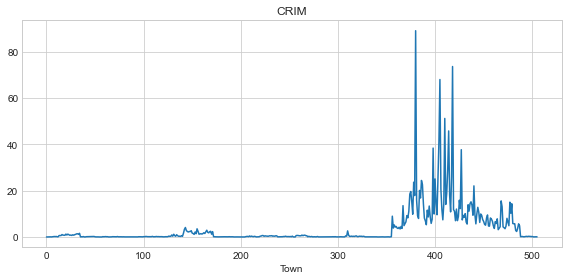

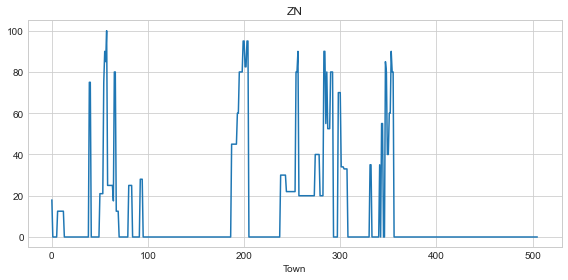

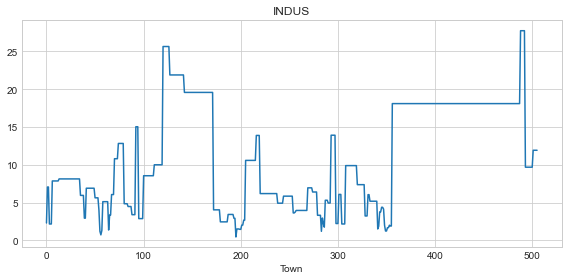

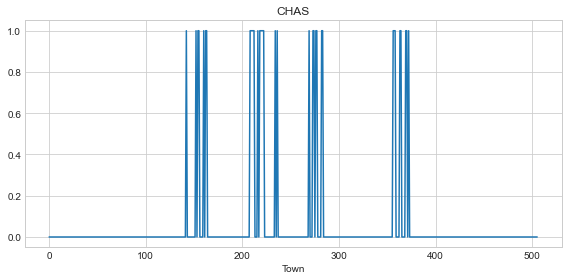

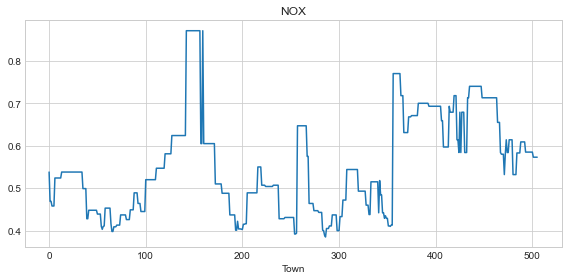

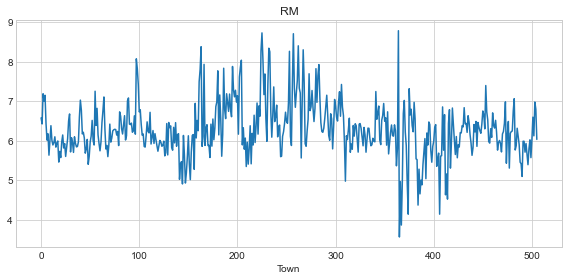

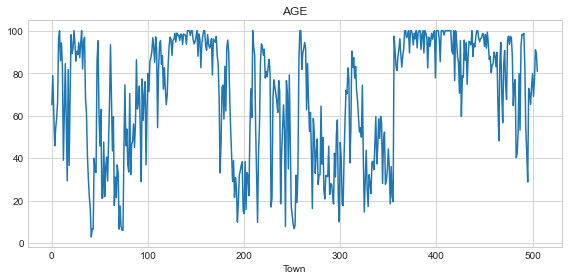

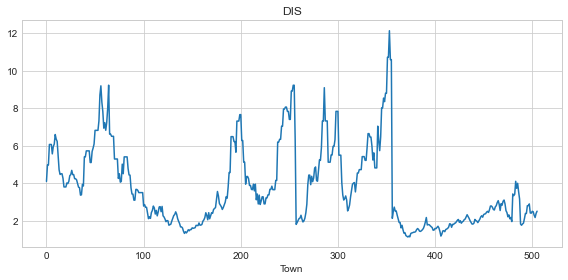

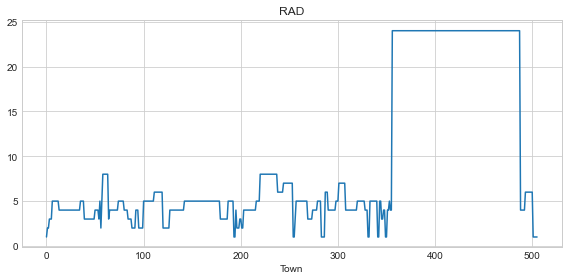

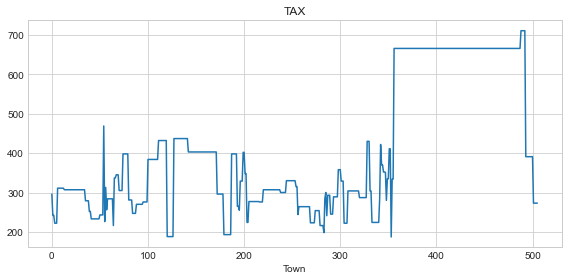

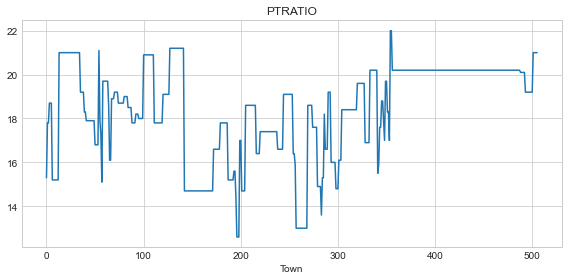

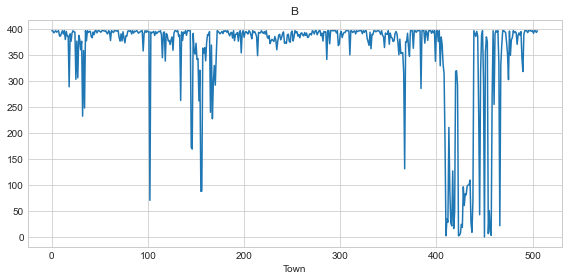

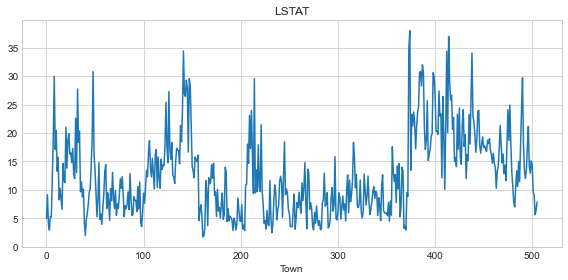

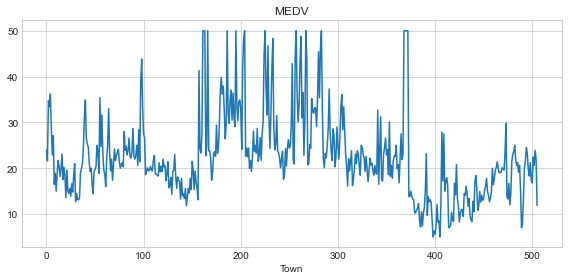

In [21]:
# 보스턴 데이터 시각화
for i,col in enumerate(boston_df.columns):
    plt.figure(figsize=(8, 4))
    plt.plot(boston_df[col])
    plt.title(col)
    plt.xlabel('Town')
    plt.tight_layout()

In [22]:
# 상관 분석을 하기위해서는 target이라고 할 수 있는 y 값을 지정해서 시각화해야함

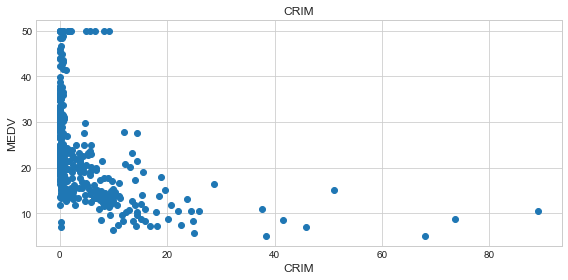

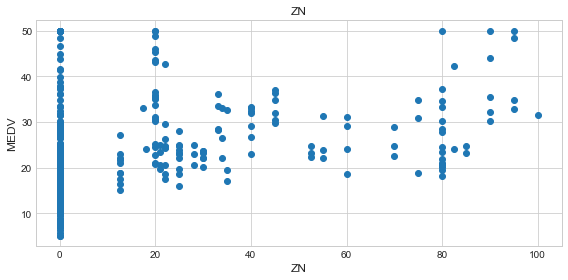

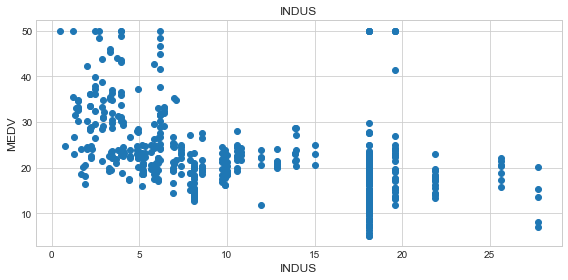

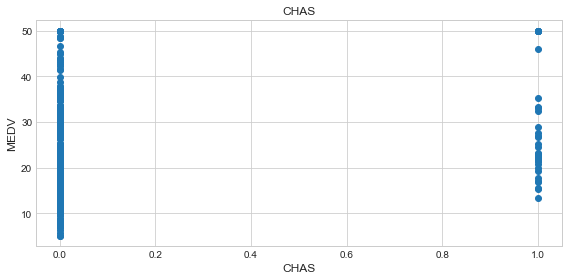

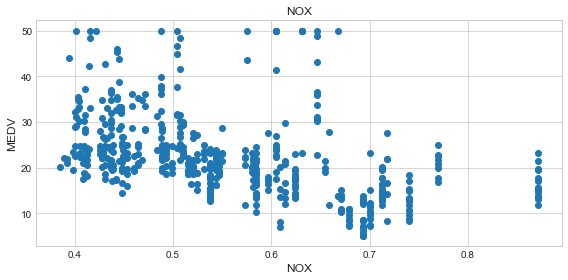

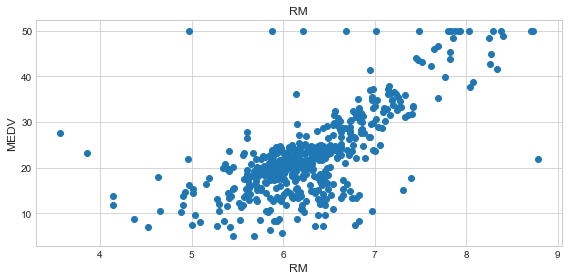

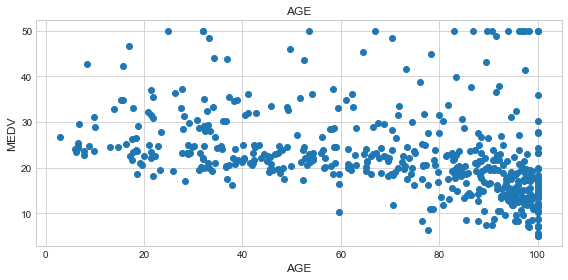

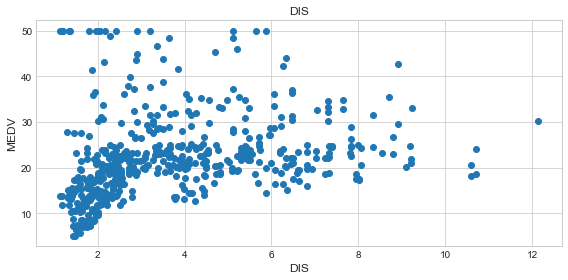

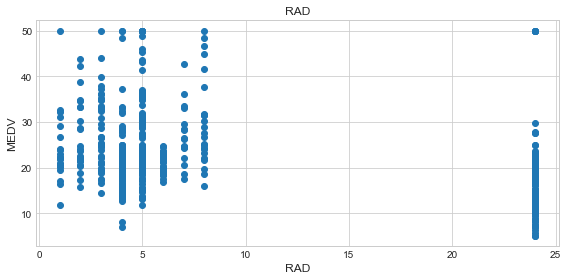

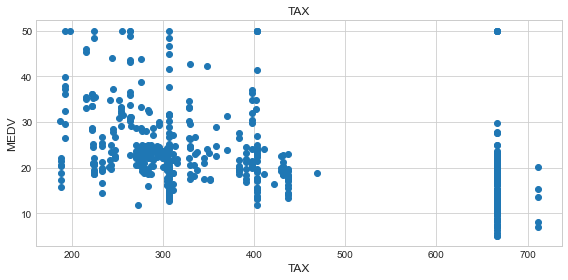

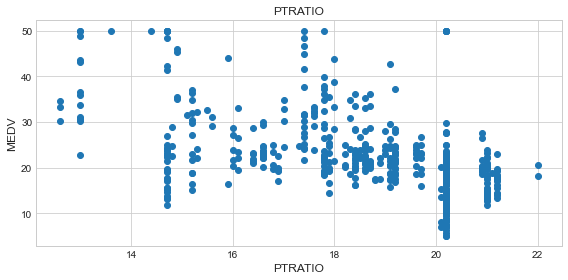

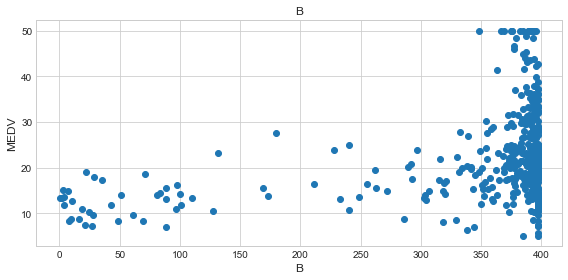

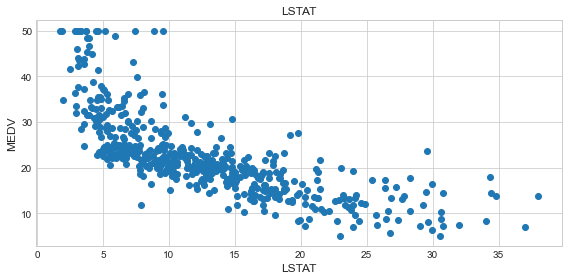

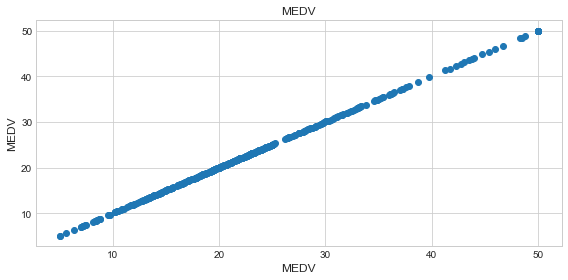

In [23]:
for i,col in enumerate(boston_df.columns):
    plt.figure(figsize=(8, 4))
    plt.scatter(boston_df[col], boston_df['MEDV'])
    plt.title(col)
    plt.xlabel(col,size = 12)
    plt.ylabel('MEDV',size = 12)
    plt.tight_layout()
    
# 어떤 columns 들이 주택가격과 상관이 있는가 

In [24]:
import seaborn as sns # 전체 columns 수치형 데이터에 대해서 상관분석과 같은 시각화 수행

# sns.pairplot(boston_df)

In [25]:
# 보스턴 주택 가격에 대한 선형 회귀

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
model = LinearRegression(normalize = True) # normalize 정규화

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.2)

In [30]:
model.fit(X_train, y_train)

LinearRegression(normalize=True)

In [31]:
print("학습 데이터 점수 : {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수 : {}".format(model.score(X_test, y_test)))
# 데이터를 두개로 분리하고모델을 생성 및 검증했지만 
# 데이터를 분리했기 때문에 훈련에 사용할 수 있는 양도 작아지고
# 분리가 잘 안된 경우에는 잘못된 검증이 될 수 도 있음.

학습 데이터 점수 : 0.7479852092754801
평가 데이터 점수 : 0.6876098464439501


In [32]:
# 이럴 경우에는 테스트셋을 여러개로 구성하여 교차 검증을 진행
# cross_val_score() 함수는 교차 검증을 수행하여 모델을 검증
# 다음 예제에서는 모델 오류를 측정하는 점수로 NMSE를 사용

In [33]:
from sklearn.model_selection import cross_val_score

In [34]:
scores = cross_val_score(model, boston.data, boston.target, cv=10, scoring='neg_mean_squared_error')
# cv = 교차검증을 위해 몇 개로 나눌건지 선택

In [35]:
print("NMSE scores: {}".format(scores))
print("NMSE scores mean: {}".format(scores.mean())) # 평균
print("NMSE scores std: {}".format(scores.std()))   # 표준편차

NMSE scores: [  -9.28694671  -14.15128316  -14.07360615  -35.20692433  -31.88511666
  -19.83587796   -9.94726918 -168.37537954  -33.32974507  -10.96041068]
NMSE scores mean: -34.70525594452486
NMSE scores std: 45.573999200308826


In [36]:
# 회귀 모델 검증을 위한 또 다른 지표 중 하나로 결정계수(coefficient of determianation)
r2_scores = cross_val_score(model, boston.data, boston.target, cv=10, scoring='r2')

In [37]:
print("R2 scores : {}".format(r2_scores))
print("R2 scores mean : {}".format(r2_scores.mean()))
print("R2 scores std : {}".format(r2_scores.std()))

R2 scores : [ 0.73376082  0.4730725  -1.00631454  0.64113984  0.54766046  0.73640292
  0.37828386 -0.12922703 -0.76843243  0.4189435 ]
R2 scores mean : 0.20252899006056463
R2 scores std : 0.595296016951227


In [38]:
# 생성된 회귀 모델에 대해서 평가를 위해 LinearRegression 객체에 포함된 두 개의 속성 값을 통해 수식을 표현

In [39]:
print('y = ' + str(model.intercept_) + '')
for i, c in enumerate(model.coef_):
    print(str(c) + '* x' + str(i))

y = 33.554635397765836
-0.0788414650353879* x0
0.03938417715278998* x1
0.019736498959328858* x2
2.775639327127615* x3
-14.62876634156795* x4
3.987492124614913* x5
-0.0038438315443167646* x6
-1.5698075970854766* x7
0.26242306153231526* x8
-0.011233497554789305* x9
-0.9428725760308272* x10
0.011706530883402023* x11
-0.568220162440778* x12


In [40]:
# NMSE, r2
# train 데이터에 대한 평가

In [41]:
from sklearn.metrics import mean_squared_error, r2_score 

In [42]:
y_train_predict = model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
# 현재 예측한 값(predict(X_train)과 실제 값(y_train)에 오차 측정(mse)
r2 = r2_score(y_train, y_train_predict)

In [43]:
print("RMSE: {}".format(rmse))   # 낮으면 좋고
print("R2 Score: {}".format(r2)) # 높으면 좋고
# 개선방향은 1. 모델을 더 좋게 2. 전처리

RMSE: 4.632880578161479
R2 Score: 0.7479852092754801


In [44]:
# test 데이터에 대한 평가

In [45]:
y_test_predict = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

In [46]:
print("RMSE: {}".format(rmse))   
print("R2 Score: {}".format(r2)) 
# train < test 성능 비교

RMSE: 5.005796754082136
R2 Score: 0.6876098464439501


In [50]:
# 시각화에 필요한 함수 만들기 
def plot_boston_prices(expected, predict):
    plt.figure(figsize=(8, 4))
    plt.scatter(expected, predict) # 실제값, 예측값
    plt.plot([5, 50], [5, 50], '--r') # 타겟값(y, 종속변수 범위)
    plt.xlabel('True price ($1,000s)')
    plt.ylabel('Predicted price ($1,000s)')
    plt.tight_layout()

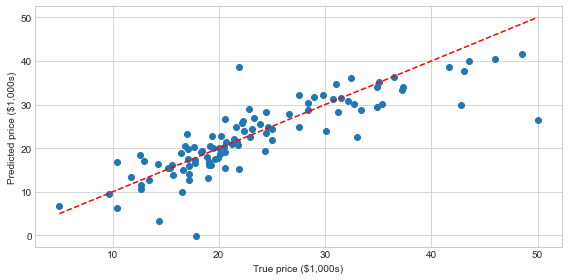

In [52]:
# 예측값 실제값 정의, 시각화
predicted = model.predict(X_test)
expected = y_test

plot_boston_prices(expected, predicted)

In [53]:
# 캘리포니아 주택 가격 데이터를 활용
# 내장되있던 보스턴은 load를 사용했었음
# 캘리포니아는 외장 데이터(용량 큼) 이므로 온라인으로 받아와야

In [55]:
from sklearn.datasets import fetch_california_housing

In [62]:
california = fetch_california_housing()

In [66]:
print(california.keys())
print(california.DESCR)

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block gro

In [67]:
# 모델을 만들기 전에 데이터를 항상 탐색하는 습관 들여야함

In [69]:
# 데이터 데이터프레임화
import pandas as pd
california_df = pd.DataFrame(data= california.data, columns=california.feature_names)

In [70]:
# 종속변수 타겟 칼럼 추가하기
california_df['Target'] = california.target

In [72]:
california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [75]:
california_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


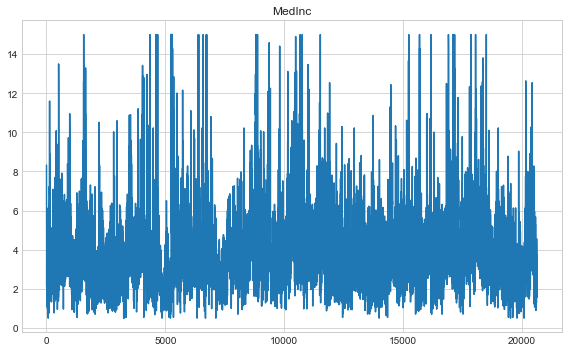

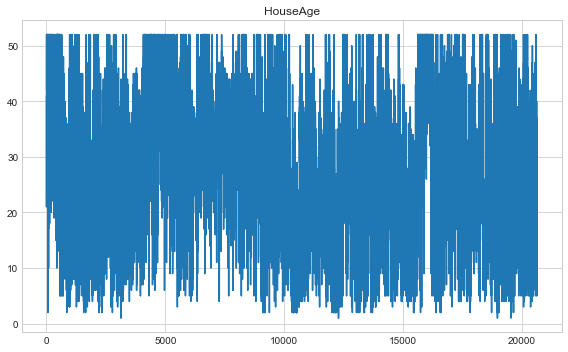

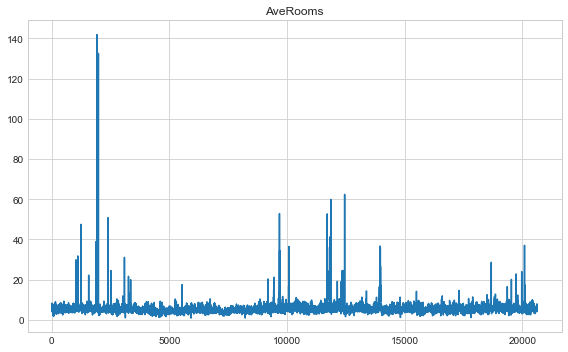

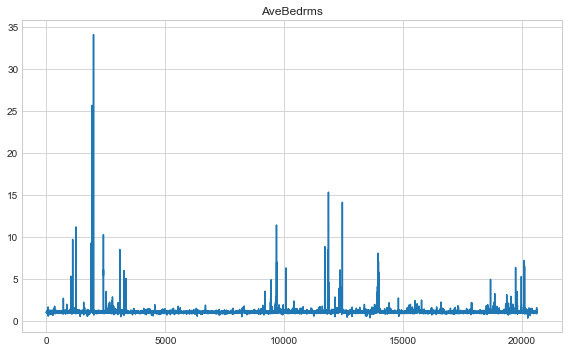

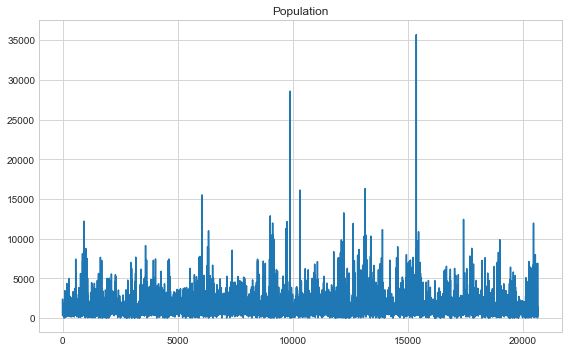

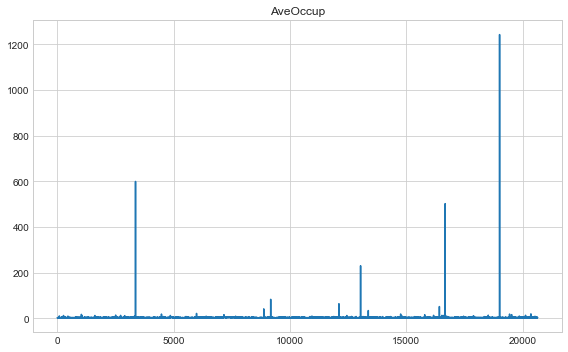

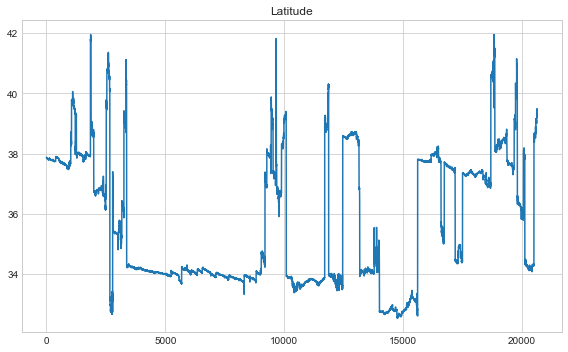

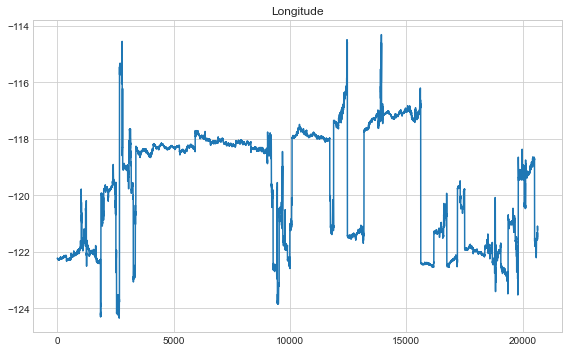

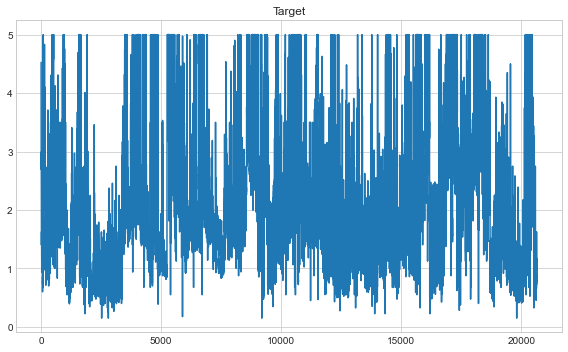

In [78]:
# 캘리포니아 데이터 프레임 시각화 
import matplotlib.pyplot as plt

for i, col in enumerate(california_df.columns):
    plt.figure(figsize=(8,5))
    plt.plot(california_df[col])
    plt.title(col)
    plt.tight_layout()

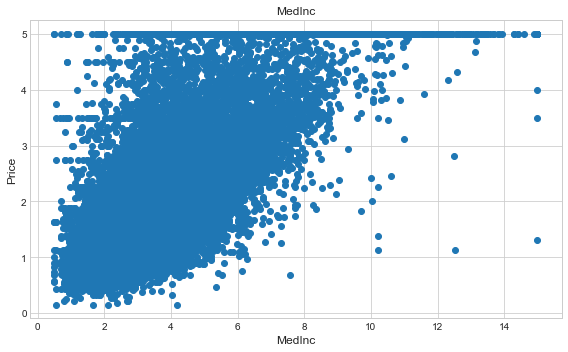

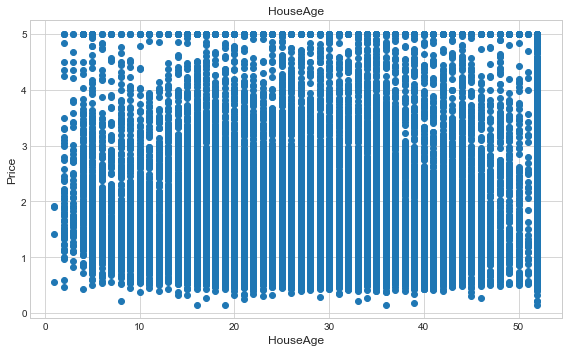

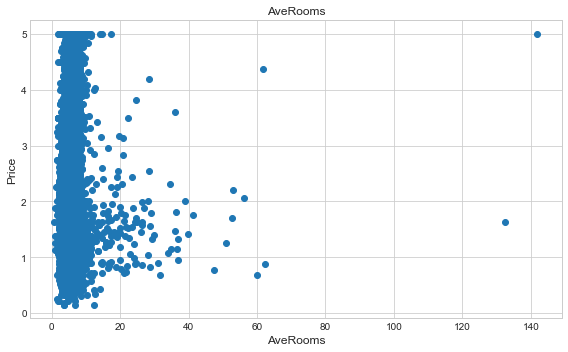

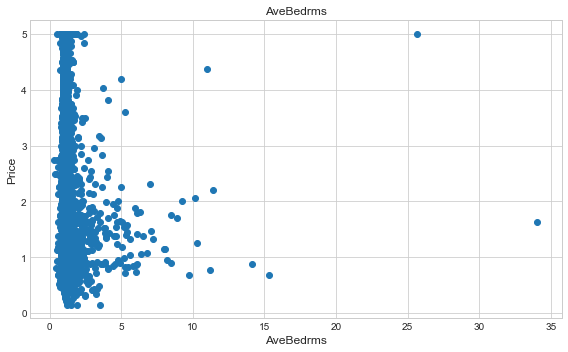

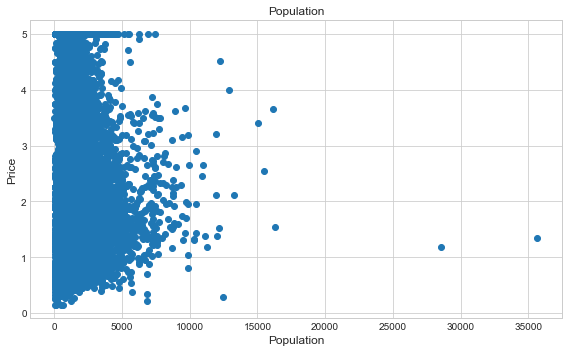

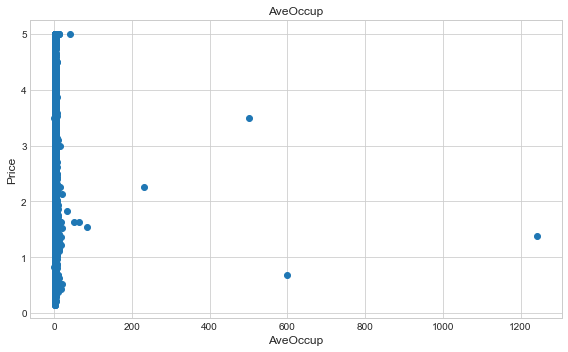

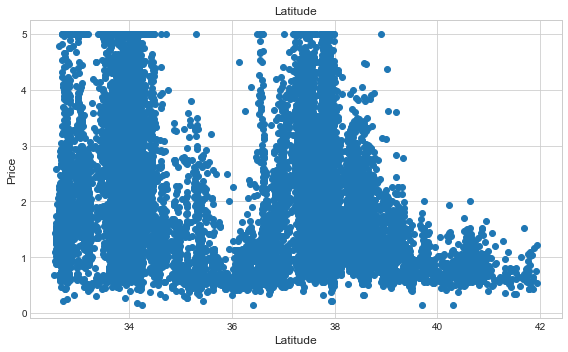

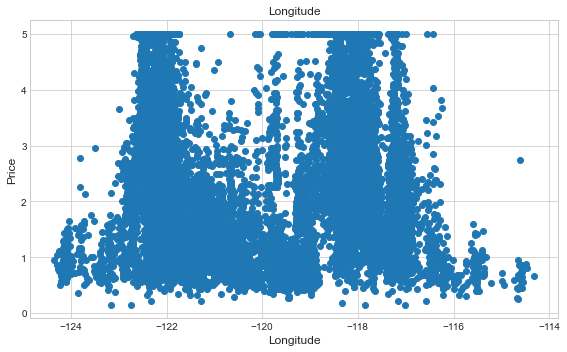

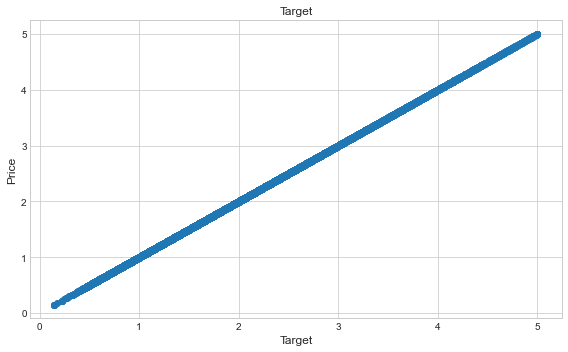

In [80]:
for i, col in enumerate(california_df.columns):
    plt.figure(figsize=(8,5))
    plt.scatter(california_df[col], california_df['Target'])
    plt.ylabel('Price', size = 12)
    plt.xlabel(col, size =12)
    plt.title(col)
    plt.tight_layout()

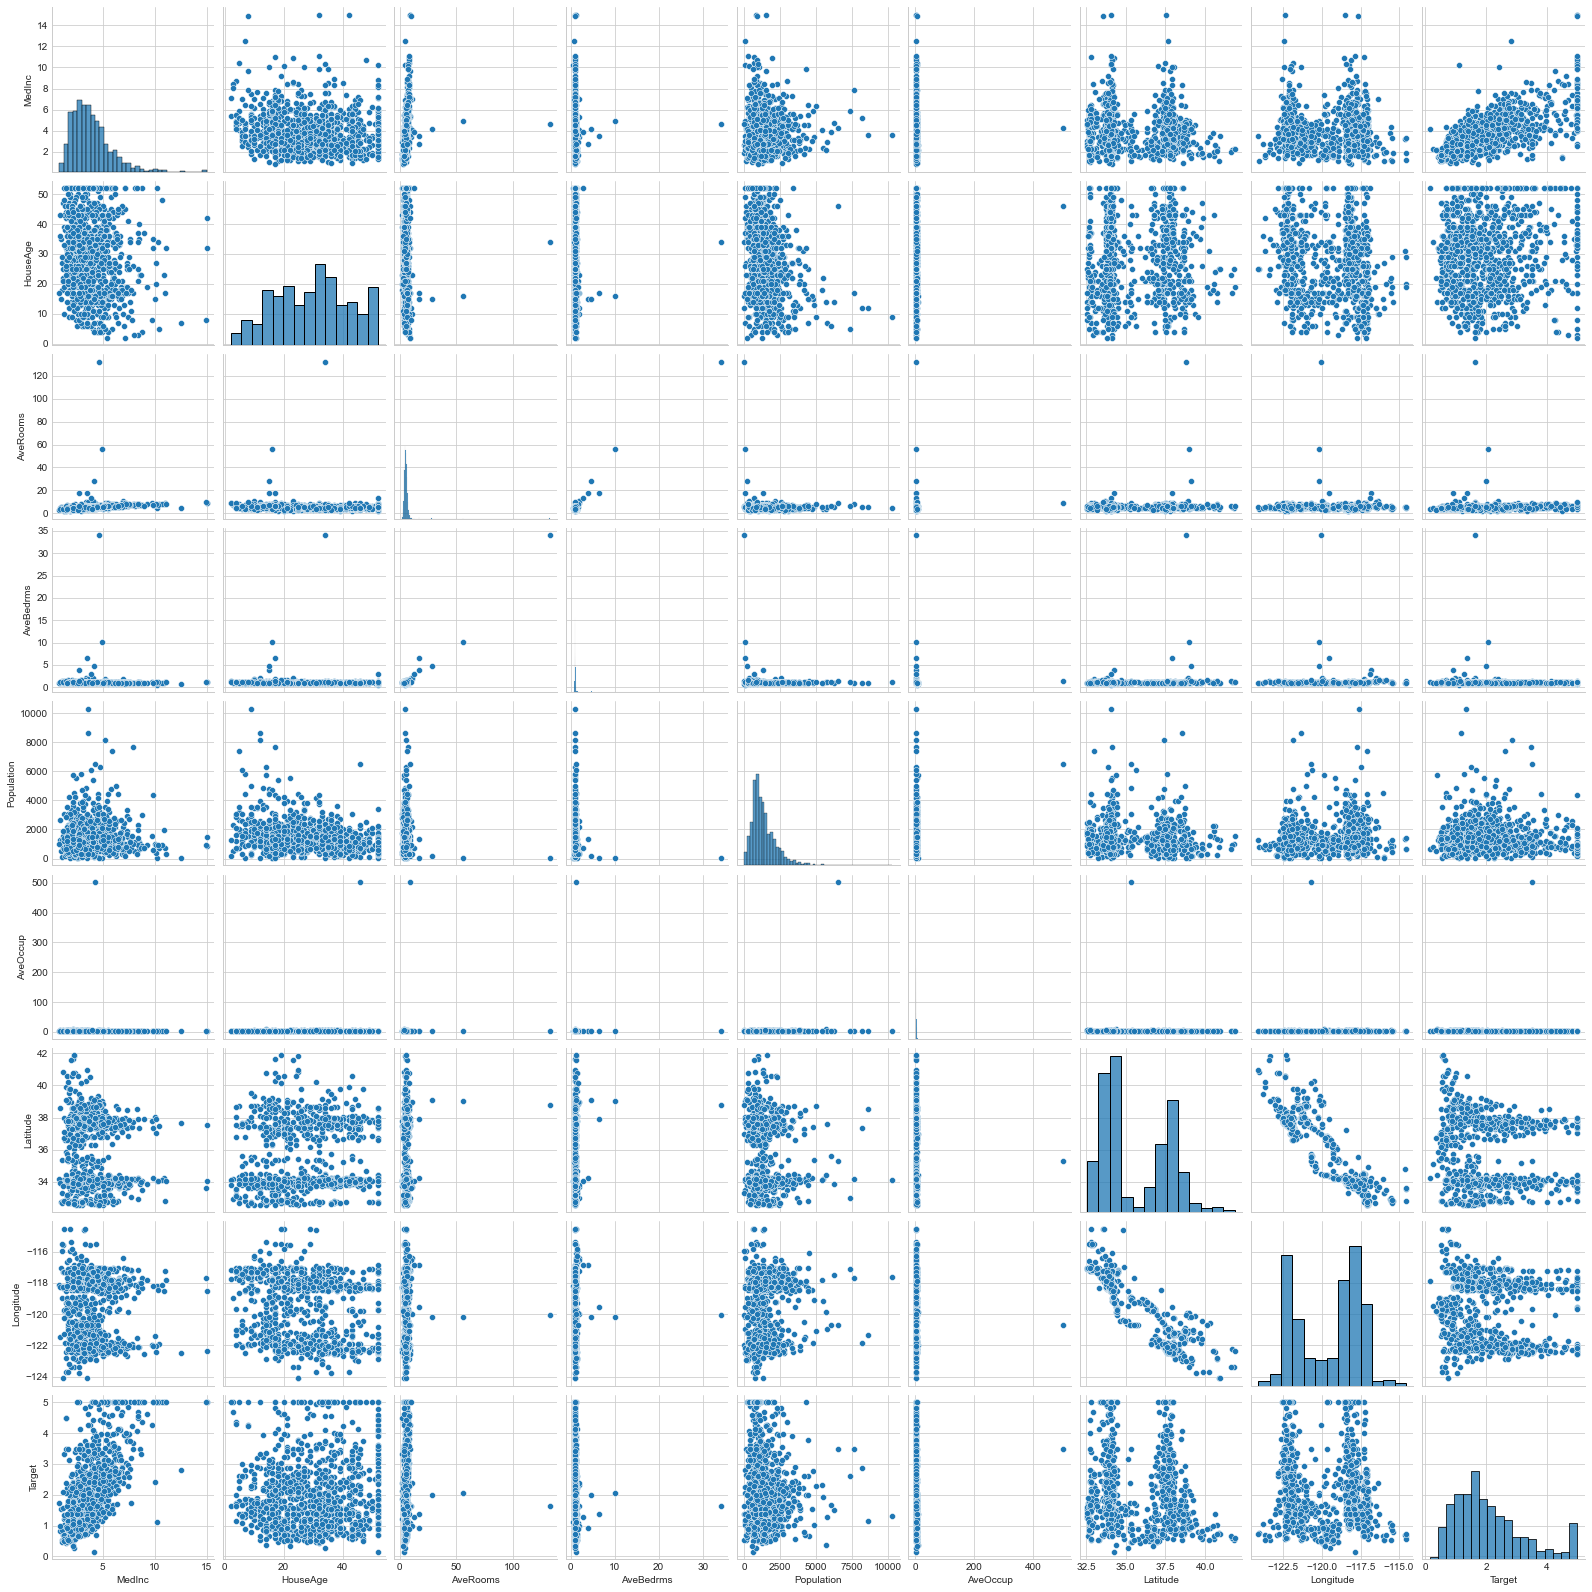

In [81]:
import seaborn as sns

sns.pairplot(california_df.sample(1000));
# 20000개 데이터 중 1000개만

In [82]:
# 캘리포니아 데이터에는 위도 경도가 있어 지도에 띄운 것 처럼 진행 할 수 있음.

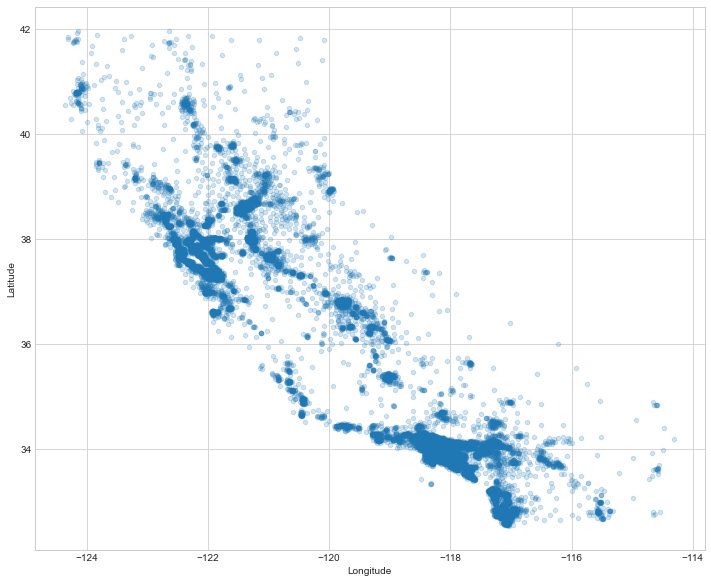

In [85]:
# 캘리포니아의 대략적인 위치를 알 수 있음 단 구분 하기 너무 힘듦
california_df.plot(kind='scatter', x= 'Longitude', y= 'Latitude', alpha = 0.2, figsize=(12, 10)); 

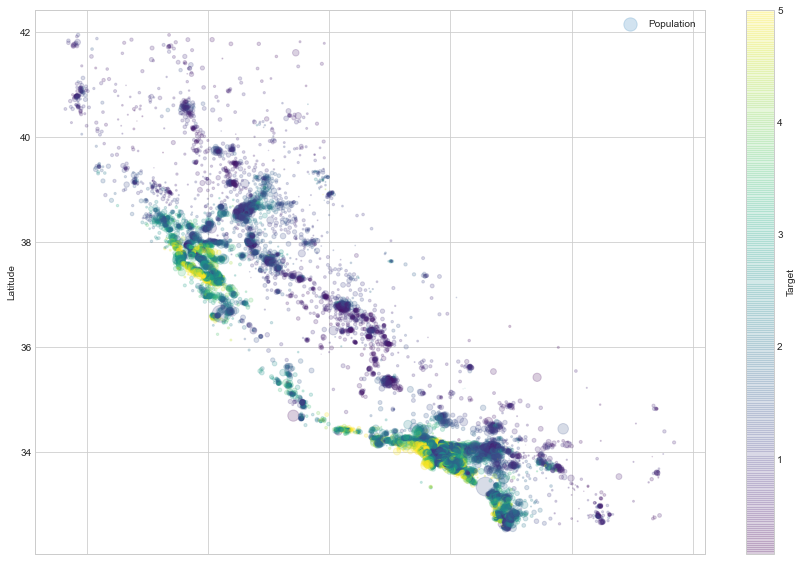

In [88]:
# 컬러 정보를 활용해 조금 더 정확히 볼 수 있도록 할 것임
# size를 넣어 분산에 크기를 설정, 100으로 나눈 이유는 데이터가 너무 크니깐 스케일링
# color에 주택가격을 넣어 구분 지어 줬음.
california_df.plot(kind='scatter', x= 'Longitude', y= 'Latitude', alpha = 0.2, figsize=(15, 10),
                  s=california_df['Population']/100, label='Population',
                  c='Target', cmap=plt.get_cmap('viridis'), colorbar=True); 